<a href="https://colab.research.google.com/github/one-2730/ESAA-24-2/blob/Project/ESAA_YB_Mini_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#와인품질예측

###전처리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/미니 프로젝트 2/data/train.csv", sep = ',', index_col = 'index')
test = pd.read_csv("/content/drive/MyDrive/미니 프로젝트 2/data/test.csv", sep = ',', index_col = 'index')

print(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 601.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999


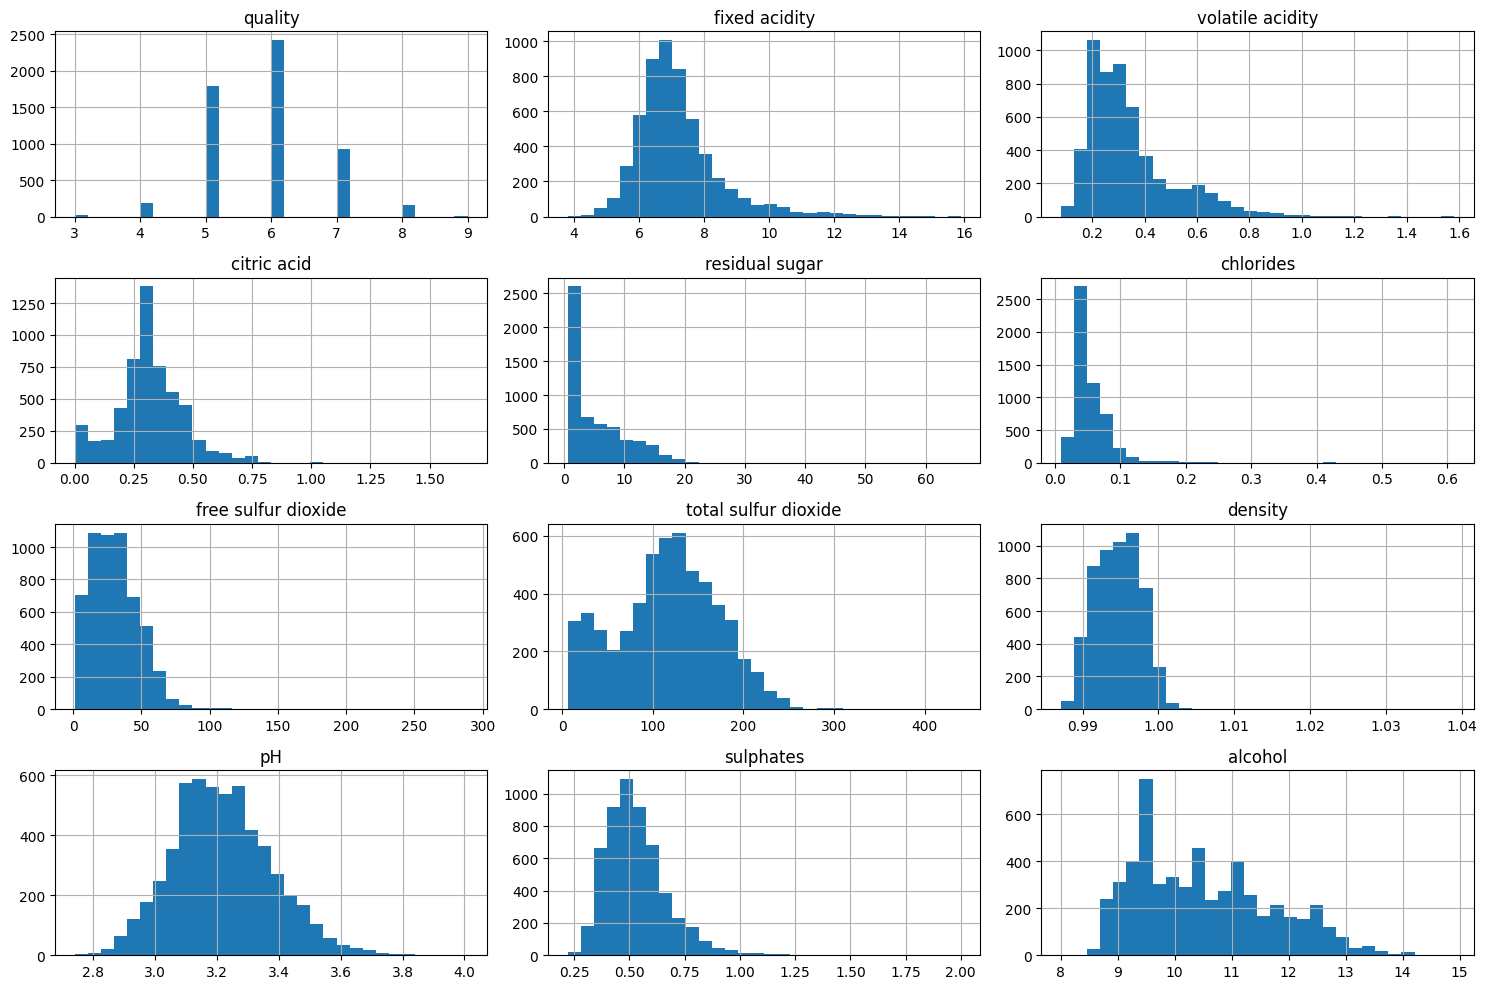

In [ ]:
train.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

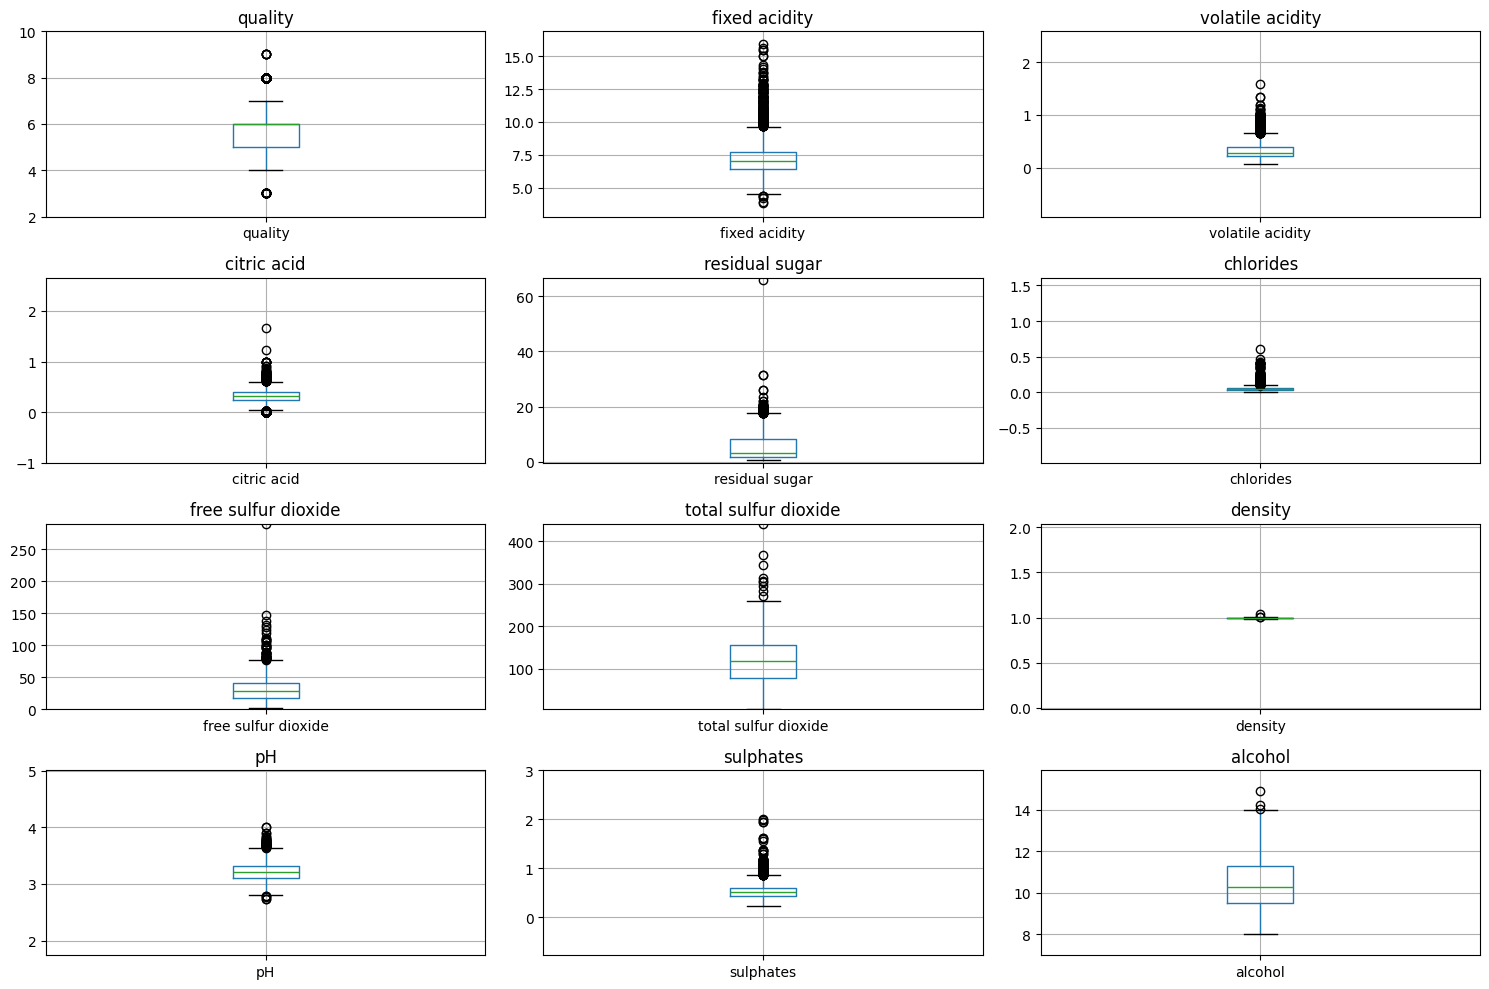

In [ ]:
features = train.columns[:-1]
num_features = len(features)
fig, axes = plt.subplots(nrows = len(features)//3, ncols=3, figsize=(15, 10))
for ax, feature in zip(axes.flatten(), features):
    train.boxplot(column=feature, ax=ax)
    ax.set_title(feature)
    ax.set_ylim(train[feature].min() - 1, train[feature].max() + 1)
plt.tight_layout()
plt.show()

정규화
fixed acidity
pH

로그변환
residual sugar

이상치 제거
residual sugar
free sulfur dioxide
total sulfur dioxide

이상치 최댓값 대체
citric acid
chlorides

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[['fixed acidity', 'pH']] = scaler.fit_transform(train[['fixed acidity', 'pH']])

In [ ]:
train[['residual sugar', 'chlorides']] = np.log1p(train[['residual sugar', 'chlorides']])

In [ ]:
for column in ['citric acid', 'chlorides']:
    max_value = train[column].max()
    second_max_value = train[column][train[column] < max_value].max()
    train[column] = train[column].replace(max_value, second_max_value)

In [ ]:
max_rows = train[(train['residual sugar'] == train['residual sugar'].max()) |
                 (train['free sulfur dioxide'] == train['free sulfur dioxide'].max()) |
                 (train['total sulfur dioxide'] == train['total sulfur dioxide'].max())]

train_cleaned = train.drop(max_rows.index)

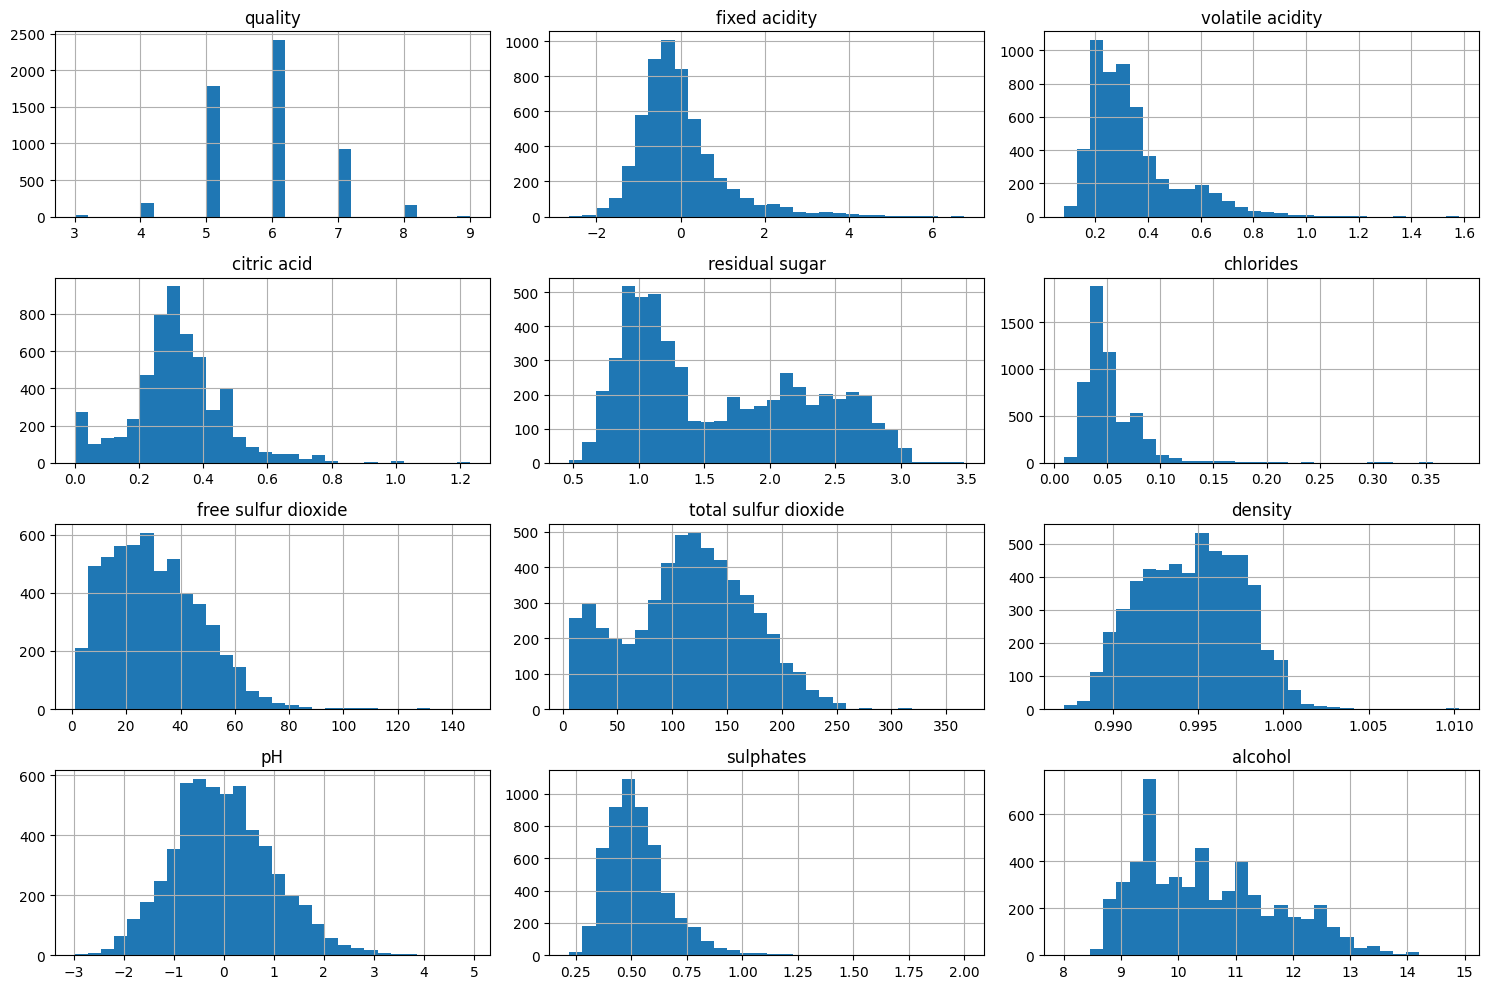

In [ ]:
train_cleaned.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

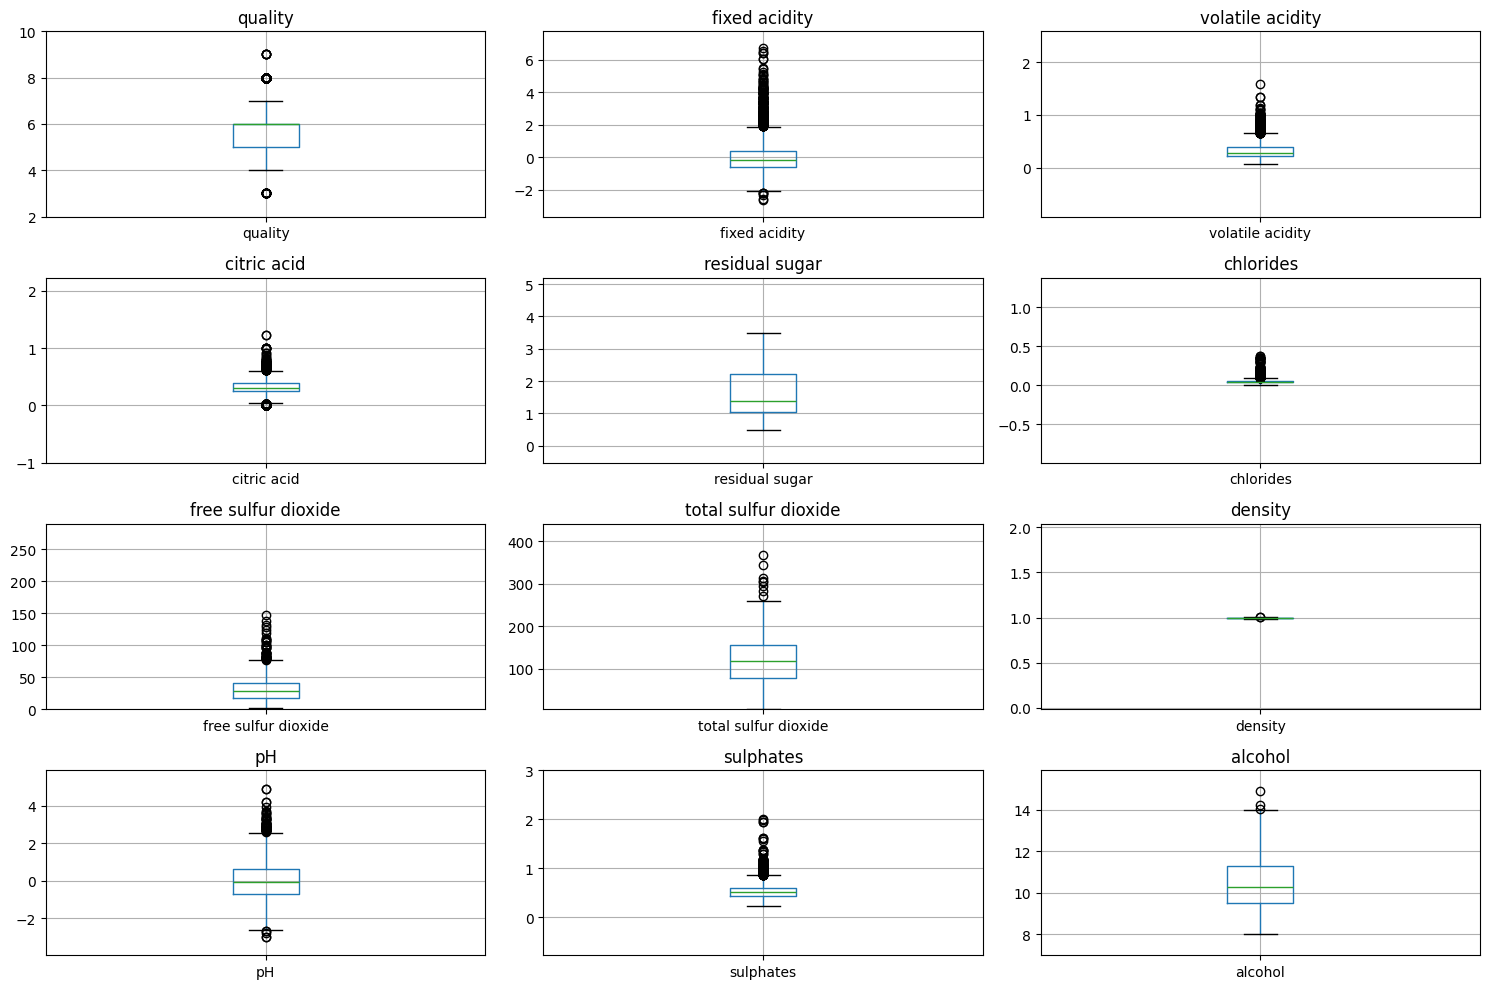

In [ ]:
features = train_cleaned.columns[:-1]
num_features = len(features)
fig, axes = plt.subplots(nrows = len(features)//3, ncols=3, figsize=(15, 10))
for ax, feature in zip(axes.flatten(), features):
    train_cleaned.boxplot(column=feature, ax=ax)
    ax.set_title(feature)
    ax.set_ylim(train[feature].min() - 1, train[feature].max() + 1)
plt.tight_layout()
plt.show()

<Axes: >

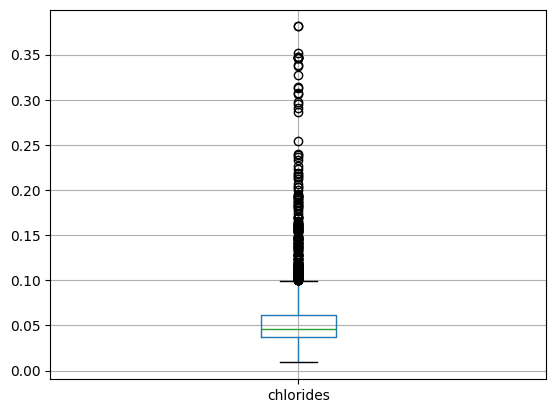

In [ ]:
train_cleaned.boxplot('chlorides')

In [ ]:
X = train_cleaned.iloc[:, 1:]
y = train_cleaned.iloc[:, 0]

print(X.info(), y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5495 entries, 0 to 5496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5495 non-null   float64
 1   volatile acidity      5495 non-null   float64
 2   citric acid           5495 non-null   float64
 3   residual sugar        5495 non-null   float64
 4   chlorides             5495 non-null   float64
 5   free sulfur dioxide   5495 non-null   float64
 6   total sulfur dioxide  5495 non-null   float64
 7   density               5495 non-null   float64
 8   pH                    5495 non-null   float64
 9   sulphates             5495 non-null   float64
 10  alcohol               5495 non-null   float64
 11  type                  5495 non-null   object 
dtypes: float64(11), object(1)
memory usage: 558.1+ KB
<class 'pandas.core.series.Series'>
Index: 5495 entries, 0 to 5496
Series name: quality
Non-Null Count  Dtype
--------------  ---

In [ ]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,
0,-1.250611,0.695,0.06,2.054124,0.041142,9.0,84.0,0.99432,1.372128,0.44,10.2,white
1,1.234899,0.610,0.14,1.223775,0.064851,10.0,42.0,0.99690,-0.183584,0.59,9.5,red
2,0.535849,0.210,0.39,1.098612,0.055435,21.0,138.0,0.99176,-1.054782,0.52,10.9,white
3,-0.163201,0.210,0.31,1.945910,0.044973,29.0,108.0,0.99390,0.252016,0.50,10.8,white
4,0.458177,0.400,0.26,2.351375,0.057325,32.0,178.0,0.99550,-1.117010,0.43,10.9,white


In [ ]:
X['type'] = np.where(X['type'] == 'white', 0, 1)

In [ ]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,
0,-1.250611,0.695,0.06,2.054124,0.041142,9.0,84.0,0.99432,1.372128,0.44,10.2,0
1,1.234899,0.610,0.14,1.223775,0.064851,10.0,42.0,0.99690,-0.183584,0.59,9.5,1
2,0.535849,0.210,0.39,1.098612,0.055435,21.0,138.0,0.99176,-1.054782,0.52,10.9,0
3,-0.163201,0.210,0.31,1.945910,0.044973,29.0,108.0,0.99390,0.252016,0.50,10.8,0
4,0.458177,0.400,0.26,2.351375,0.057325,32.0,178.0,0.99550,-1.117010,0.43,10.9,0


In [ ]:
y.head()

,quality
index,
0,5
1,5
2,5
3,6
4,6


<Axes: >

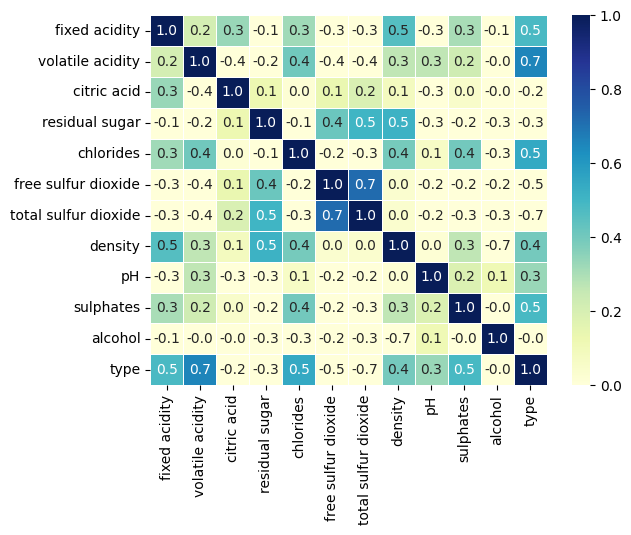

In [ ]:
sns.heatmap(X.corr(), vmin=0, vmax=1, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=0.5)

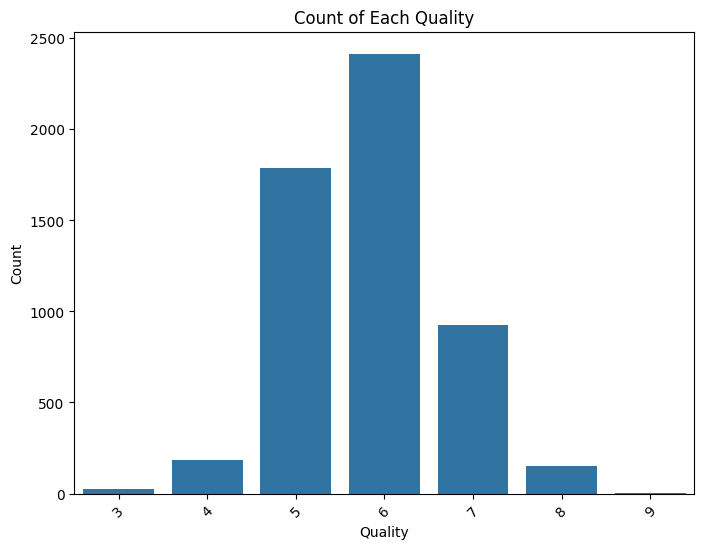

In [ ]:
quality_counts = y.value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=quality_counts.index, y=quality_counts.values)
plt.title('Count of Each Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
y = y-3

In [ ]:
y.value_counts()

,count
quality,
3,2415
2,1788
4,924
1,186
5,152
0,25
6,5


In [ ]:
#X.drop('type', axis = 1, inplace = True)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,
0,-1.250611,0.695,0.06,2.054124,0.041142,9.0,84.0,0.99432,1.372128,0.44,10.2,0
1,1.234899,0.610,0.14,1.223775,0.064851,10.0,42.0,0.99690,-0.183584,0.59,9.5,1
2,0.535849,0.210,0.39,1.098612,0.055435,21.0,138.0,0.99176,-1.054782,0.52,10.9,0
3,-0.163201,0.210,0.31,1.945910,0.044973,29.0,108.0,0.99390,0.252016,0.50,10.8,0
4,0.458177,0.400,0.26,2.351375,0.057325,32.0,178.0,0.99550,-1.117010,0.43,10.9,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

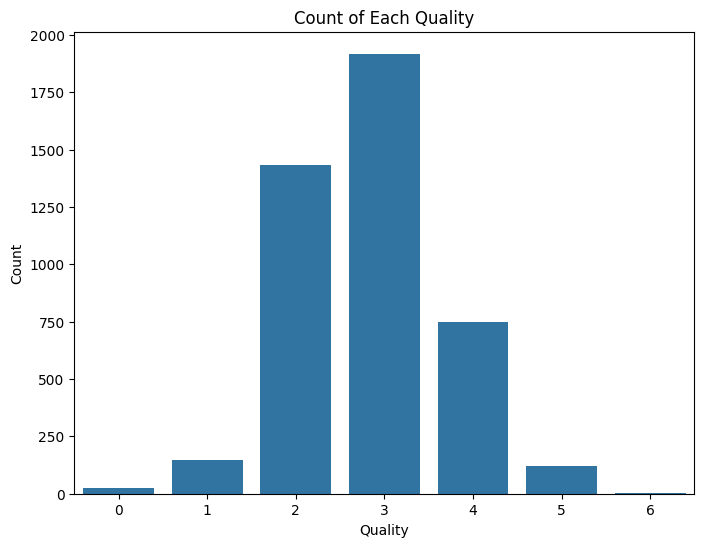

In [ ]:
quality_counts = y_train.value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=quality_counts.index, y=quality_counts.values)
plt.title('Count of Each Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=2, random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 피처/레이블 데이터 세트:', X_train_resampled.shape, y_train_resampled.shape)

SMOTE 적용 전 피처/레이블 데이터 세트: (4396, 12) (4396,)
SMOTE 적용 후 피처/레이블 데이터 세트: (13426, 12) (13426,)


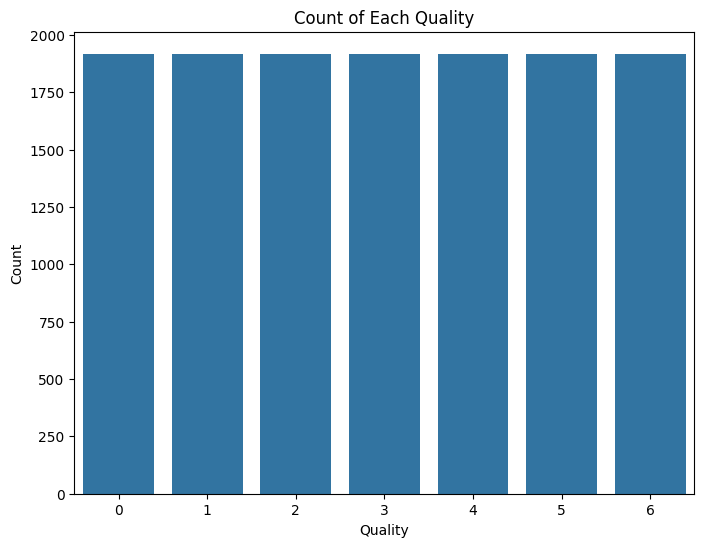

In [ ]:
quality_counts = y_train_resampled.value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=quality_counts.index, y=quality_counts.values)
plt.title('Count of Each Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

### 결정트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

Feature importances:
[0.067 0.105 0.081 0.077 0.073 0.098 0.106 0.07  0.078 0.102 0.139 0.003]
fixed acidity:0.067
volatile acidity:0.105
citric acid:0.081
residual sugar:0.077
chlorides:0.073
free sulfur dioxide:0.098
total sulfur dioxide:0.106
density:0.070
pH:0.078
sulphates:0.102
alcohol:0.139
type:0.003


<Axes: ylabel='None'>

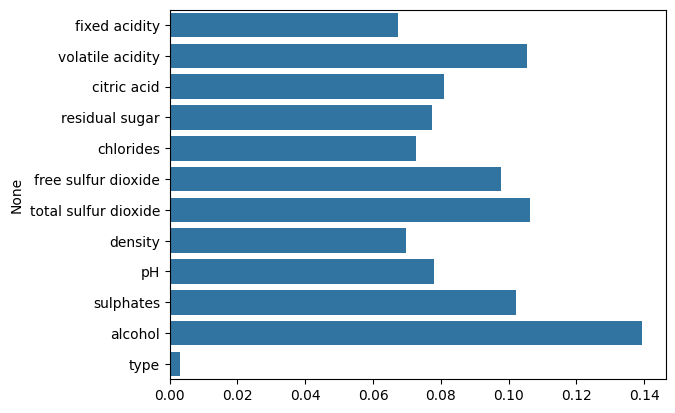

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

feature_names = X.columns

# feature별 importance 매핑
for name, value in zip(feature_names, dt_clf.feature_importances_):
  print("{0}:{1:.3f}".format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=feature_names)

In [ ]:
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.5714


In [ ]:
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [ ]:
from sklearn.model_selection import GridSearchCV

params={'max_depth':[6,8,10,12,16,20,24], 'min_samples_split':[16]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.5398
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
# GridSearchCV 객체의 cv_results_ 속성을 DF로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라키터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.533900
1,8,0.539814
2,10,0.534121
3,12,0.529346
4,16,0.529344
5,20,0.528886
6,24,0.528435


In [ ]:
params = {
    'max_depth':[8,12,16,20],
    'min_samples_split':[16,24]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치:0.5403
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
best_df_clf = grid_cv.best_estimator_
dt_pred=best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, dt_pred)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.5396


### Random Forest:

리더보드: 0.665

**Evaluation 함수 생성**

In [ ]:
# get_clf_eval() 함수를 이용해 평가 수행
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='macro', zero_division=0)
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')
    #y_test_onehot = label_binarize(y_test, classes=train['quality'].unique())
    #pred_onehot = label_binarize(pred, classes=train['quality'].unique())
    #roc_auc = roc_auc_score(y_test_onehot, pred_onehot, average='macro', multi_class='ovr')
    roc_auc = roc_auc_score(y_test, pred, average='macro', multi_class='ovr')
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:, 1]
  get_clf_eval(tgt_test, pred, pred_proba)
  kfold = KFold(n_splits=10, random_state=22, shuffle=True)
  cv_result = cross_val_score(model, ftr_train, tgt_train, cv=kfold, scoring='accuracy')
  print('Cross validated score is:', cv_result.mean())

In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    roc_auc = roc_auc_score(y_test, pred_proba, multi_class='ovr')

    print('오차 행렬')
    print(confusion)
    print('정확도: {0: .4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))



**Basic Algorithm**

In [ ]:
# Basic Algorithm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)
print(get_clf_eval(y_test, rf_pred, rf_pred_proba))


오차 행렬
[[  0   0   2   0   0   0   0]
 [  0   5  24  11   0   0   0]
 [  0   2 251  97   4   0   0]
 [  0   0  74 388  35   0   0]
 [  0   0   5  87  84   0   0]
 [  0   0   0  16   5   8   0]
 [  0   0   0   1   0   0   0]]
정확도:  0.6697, 정밀도: 0.6770, 재현율: 0.6697, F1: 0.6553, AUC: 0.8788
None


In [ ]:
rf_pred.shape

(1099,)

In [ ]:
X_test.shape

(1099, 12)

Cross validated score for RandomForest is: 0.6660602609235865
Model variance of RandomForest is: 0.014077577563700998


<Axes: >

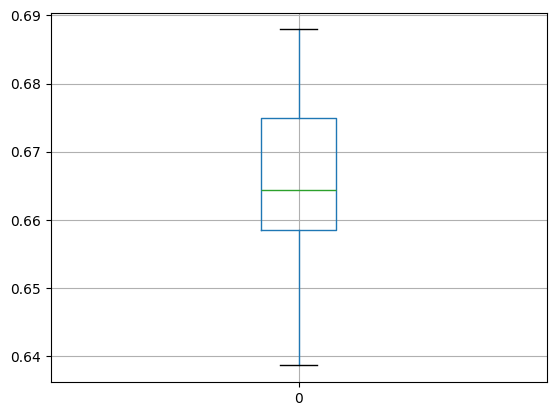

In [ ]:
# KFold Cross Validation
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

kfold = KFold(n_splits=10, random_state=22, shuffle=True)
accuracy=[]
cv_result = cross_val_score(rf_clf, X_train, y_train, cv=kfold, scoring='accuracy')
print('Cross validated score for RandomForest is:', cv_result.mean())
print('Model variance of RandomForest is:', cv_result.std())

accuracy.append(cv_result)
pd.DataFrame(accuracy).T.boxplot()

**HyperParameter Tuning**

In [ ]:
# HyperParameter Tuning Using Baeysian Estimator
from hyperopt import hp, STATUS_OK

rf_search_space = {'n_estimators' : hp.quniform('n_estimators', 100, 1000, 100),
                   'max_depth' :  hp.quniform('max_depth', 5, 20, 1),
                   'min_samples_leaf' : hp.quniform('min_samples_leaf', 1, 12, 1),
                   'min_samples_split' : hp.quniform('min_samples_split', 2, 16, 1)
}

def objective_func(search_space):
  rf_clf = RandomForestClassifier(n_estimators=int(search_space['n_estimators']),
                                  max_depth=int(search_space['max_depth']),
                                  min_samples_leaf=int(search_space['min_samples_leaf']),
                                  min_samples_split=int(search_space['min_samples_split']))

  accuracy = cross_val_score(rf_clf, X_train, y_train, scoring='accuracy', cv=3)

  # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
  return {'loss':-1 * np.mean(accuracy), 'status':STATUS_OK}

# fmin()으로 최적 하이퍼 파라미터 도출
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=rf_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정
            trials=trial_val,
            rstate=np.random.default_rng(seed=9))

print('n_estimators:{0}, max_depth:{1}, min_samples_leaf:{2}, min_samples_split:{3}'.format(round(best['n_estimators']), round(best['max_depth']), round(best['min_samples_leaf']), round(best['min_samples_split'])))


100%|██████████| 50/50 [12:25<00:00, 14.92s/trial, best loss: -0.6348981153394267]
n_estimators:1000, max_depth:19, min_samples_leaf:1, min_samples_split:4


In [ ]:
# Evaluation
rf_clf = RandomForestClassifier(n_estimators=900, max_depth=18, min_samples_leaf=2, min_samples_split=5)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
accuracy_score(rf_pred, y_test)

### XGBoost:


In [ ]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Warning 메시지를 없애기 위해 eval_metrics 값을 XGBClassifier 생성 인자로 입력.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
                            eval_metric="logloss")
xgb_wrapper.fit(X_train.values, y_train.values, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)  # 전체 확률을 가져옴

In [ ]:
# 모델 성능을 높이기 위해 grid_search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5, 7],
}
grid_search = GridSearchCV(estimator=xgb_wrapper, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=400,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'learning_rate': [0.01, 0.05], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)

최적 하이퍼파라미터: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}
최고 정확도: 0.6192000086915089


In [ ]:
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
best_xgb_preds = best_xgb_model.predict(X_test)  # 클래스 레이블 예측
best_xgb_pred_proba = best_xgb_model.predict_proba(X_test)  # 각 클래스에 대한 확률

#get_clf_eval(y_test, best_xgb_preds, best_xgb_pred_proba)

### LGBM:

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier
# 다시 지정(xgboost에서 -3한 것 초기화)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# logloss로 성능평가
lgbm_clf = LGBMClassifier(n_estimators=500, early_stopping_rounds=100, eval_metric='logloss', verbose=-1)
evals = [(X_train, y_train), (X_test, y_test)]
lgbm_clf.fit(X_train, y_train, eval_set=evals)

lgbm_preds = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)

get_clf_eval(y_test, lgbm_preds, pred_proba)

오차 행렬
[[  0   0   2   0   0   0   0]
 [  0   3  29   8   0   0   0]
 [  0   2 237 110   5   0   0]
 [  0   0  89 362  46   0   0]
 [  0   0   5  85  86   0   0]
 [  0   0   2  13   6   8   0]
 [  0   0   0   0   1   0   0]]
정확도:  0.6333, 정밀도: 0.6368, 재현율: 0.6333, F1: 0.6196, AUC: 0.8290


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

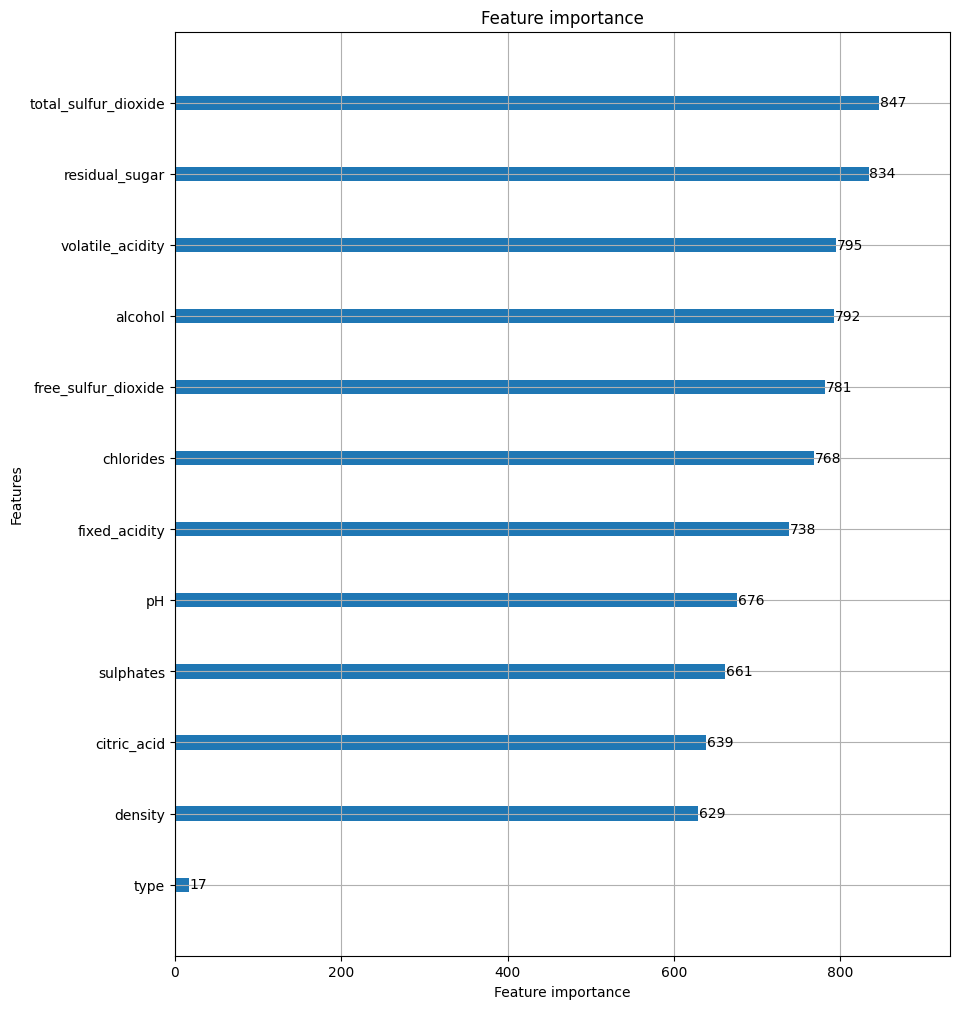

In [ ]:
# 피처 중요도 시각화

from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_clf, ax=ax)

In [ ]:
# HyperOpt로 하이퍼 파라미터 튜닝
# 튜닝 대상을 위한 검색 공간 설정
from hyperopt import hp, STATUS_OK
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves',32, 64, 1),
                     'max_depth': hp.quniform('max_depth',100,160,1),
                     'min_child_samples': hp.quniform('min_child_samples',60,100,1),
                     'subsample': hp.uniform('subsample',0.7,1),
                     'learning_rate':hp.uniform('learning_rate', 0.01, 0.2),
                     }

In [ ]:
def objective_func_lgbm(search_space):
  lgbm_clf = LGBMClassifier(n_estimators=100,
                            num_leaves=int(search_space['num_leaves']),
                            max_depth=int(search_space['max_depth']),
                            min_child_samples=int(search_space['min_child_samples']),
                            subsample=search_space['subsample'],
                            learning_rate=search_space['learning_rate'])
                            #early_stopping_rounds=30

  accuracy = cross_val_score(lgbm_clf, X_train, y_train, scoring='accuracy', cv=3)

  # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
  return {'loss':-1 * np.mean(accuracy), 'status':STATUS_OK}

In [ ]:
# fmin()으로 최적 하이퍼 파라미터 도출
from hyperopt import fmin, tpe, Trials

trials = Trials()

In [ ]:
# fmin() 호출, max_evals 지정 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출.
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict


best = fmin(fn=objective_func_lgbm, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=100, #최대 반복 횟수
            trials=trials, rstate=np.random.default_rng(seed=30))
print('best:', best)

100%|██████████| 100/100 [04:58<00:00,  2.99s/trial, best loss: -0.6244309001764686]
best: {'learning_rate': 0.1320702625270986, 'max_depth': 124.0, 'min_child_samples': 60.0, 'num_leaves': 49.0, 'subsample': 0.9389873306069583}


In [ ]:
# 위에서 구한 하이퍼 파라미터를 이용하여 LightGBM 재학습, 테스트 데이터에서 ROC-AUC 평가
lgbm_clf = LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                          max_depth=int(best['max_depth']),
                          min_child_samples=int(best['min_child_samples']),
                          subsample=round(best['subsample'],5),
                          learning_rate=round(best['learning_rate'],5),
                          early_stopping_rounds=100,
                          eval_metric='auc')
# 학습 수행
lgbm_clf.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)])

lgbm_pred = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)

get_clf_eval(y_test, lgbm_pred, pred_proba)

# lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test))
# print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	training's multi_logloss: 0.445224	valid_1's multi_logloss: 0.929861
오차 행렬
[[  0   0   2   0   0   0   0]
 [  0   3  28   9   0   0   0]
 [  0   2 246  97   9   0   0]
 [  0   0  90 359  48   0   0]
 [  0   0   5  67 101   3   0]
 [  0   0   0  15   5   9   0]
 [  0   0   0   0   1   0   0]]
정확도:  0.6533, 정밀도: 0.6506, 재현율: 0.6533, F1: 0.6412, AUC: 0.8037


In [ ]:
# 하이퍼 파라미터 튜닝 시 정밀도만 조금 더 올라감을 확인.

###스태킹

In [ ]:
print(dt_pred.shape, rf_pred.shape, best_xgb_preds.shape, lgbm_pred.shape)

(1099,) (1099,) (1099,) (1099,)


In [ ]:
from sklearn.linear_model import LogisticRegression

pred = pd.DataFrame([dt_pred, rf_pred, best_xgb_preds, lgbm_pred])
pred = np.transpose(pred)

X_final_train, X_val, y_final_train, y_val = train_test_split(pred, y_test, test_size = 0.3, random_state = 0)

In [ ]:
lr_final = LogisticRegression()
lr_final.fit(X_final_train, y_final_train)

lr_final_pred = lr_final.predict(X_val)
lr_final_pred_proba = lr_final.predict_proba(X_val)

In [ ]:
accuracy_score(y_val, lr_final_pred)

0.6666666666666666

In [ ]:
rf_final = RandomForestClassifier()
rf_final.fit(X_final_train, y_final_train)
rf_final_pred = rf_final.predict(X_val)

accuracy_score(y_val, rf_final_pred)

0.6606060606060606

###보팅

In [539]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


ensemble_lin_rbf = VotingClassifier(estimators=[('RFor', RandomForestClassifier(n_estimators=1000, random_state=0, max_depth=19, min_samples_leaf=1, min_samples_split=4)),
                                              ('DT', DecisionTreeClassifier(max_depth=8, min_samples_split=16, random_state=0)),
                                              ('xgb', XGBClassifier(learning_rate= 0.05, max_depth=7, n_estimators=200)),
                                                ('lgb', LGBMClassifier(learning_rate=0.1320702625270986, max_depth=124, min_child_samples=60, num_leaves= 49, subsample= 0.9389873306069583))],
                                    voting='soft').fit(X_train, y_train)

print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(X_test, y_test))

The accuracy for ensembled model is: 0.6596906278434941


#test 처리

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
test[['fixed acidity', 'pH']] = scaler.fit_transform(test[['fixed acidity', 'pH']])

In [ ]:
test[['residual sugar', 'chlorides']] = np.log1p(test[['residual sugar', 'chlorides']])

##제출파일

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/미니 프로젝트 2/data/sample_submission.csv", sep = ',', index_col = 'index')

In [ ]:
submission

,quality
index,
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0


In [ ]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,
0,1.306951,0.31,0.48,2.028148,0.042101,11.0,73.0,0.99380,-1.943080,0.38,11.6,white
1,4.507070,0.43,0.58,1.064711,0.067659,15.0,40.0,1.00040,-0.949812,0.49,9.0,red
2,-0.553583,0.28,0.27,1.824549,0.039221,44.0,179.0,0.99480,-0.142782,0.69,9.4,white
3,-0.032634,0.15,0.39,1.029619,0.042101,21.0,159.0,0.99480,1.905833,0.47,10.0,white
4,-0.330319,0.26,0.26,1.098612,0.018822,23.5,72.0,0.99041,-0.329020,0.47,11.8,white


In [ ]:
test['type'] = np.where(test['type'] == 'white', 0, 1)

In [ ]:
submission['quality'] = rf_clf.predict(test)+3

In [ ]:
submission.to_csv('Submission.csv', index=True)

In [ ]:
submission['quality'].value_counts()

,count
quality,
6,506
5,360
7,126
8,6
4,2


In [ ]:
submission2 = submission

dt_pred_test = dt_clf.predict(test)
rf_pred_test = rf_clf.predict(test)
xgb_pred_test = best_xgb_model.predict(test)
lgbm_pred_test = lgbm_clf.predict(test)

pred_test = pd.DataFrame([dt_pred_test, rf_pred_test, xgb_pred_test, lgbm_pred_test])
pred_test = np.transpose(pred_test)

submission2['quality'] =  lr_final.predict(pred_test) +3
submission2.to_csv('Submission2.csv', index=True)

In [538]:
submission3 = submission

submission3['quality'] = ensemble_lin_rbf.predict(test)+3

submission3.to_csv('Submission3.csv', index=True)